In [2]:
# Importing TensorFlow and tf.keras for building and training the model
import tensorflow as tf

# Importing helper libraries for numerical operations and plotting
import numpy as np
import matplotlib.pyplot as plt

# Printing the TensorFlow version to verify the installation
print(tf.__version__)


2.16.1


In [4]:
# Loading the Fashion MNIST dataset from TensorFlow's Keras datasets module
fashion_mnist = tf.keras.datasets.fashion_mnist

# Splitting the dataset into training and testing sets
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [6]:
# Defining class names for the Fashion MNIST dataset labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [8]:
# Checking the shape of the training images to understand the dimensions of the dataset
train_images.shape


(60000, 28, 28)

In [10]:
# Checking the number of training labels to verify the size of the training set
len(train_labels)


60000

In [12]:
# Displaying the training labels to see the actual labels for the training images
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
# Checking the shape of the test images to understand the dimensions of the test dataset
test_images.shape


(10000, 28, 28)

In [16]:
# Checking the number of test labels to verify the size of the test set
len(test_labels)


10000

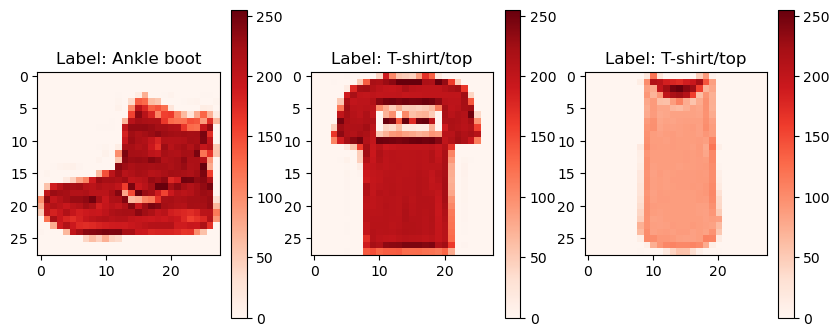

In [26]:
# Plotting the first three images in the training set
plt.figure(figsize=(10, 4))  # Creating a new figure with a specified size

for i in range(3):  # Looping through the first three images
    plt.subplot(1, 3, i + 1)  # Creating subplots in a 1x3 grid
    plt.imshow(train_images[i], cmap='Reds')  # Displaying the image with a red color map
    plt.colorbar()  # Adding a color bar to the side of the image
    plt.grid(False)  # Hiding the grid lines
    plt.title(f"Label: {class_names[train_labels[i]]}")  # Adding a title with the class name

plt.show()  # Showing the plot


In [28]:
# Normalizing the training images by scaling pixel values to the range [0, 1]
train_images = train_images / 255.0

# Normalizing the test images by scaling pixel values to the range [0, 1]
test_images = test_images / 255.0


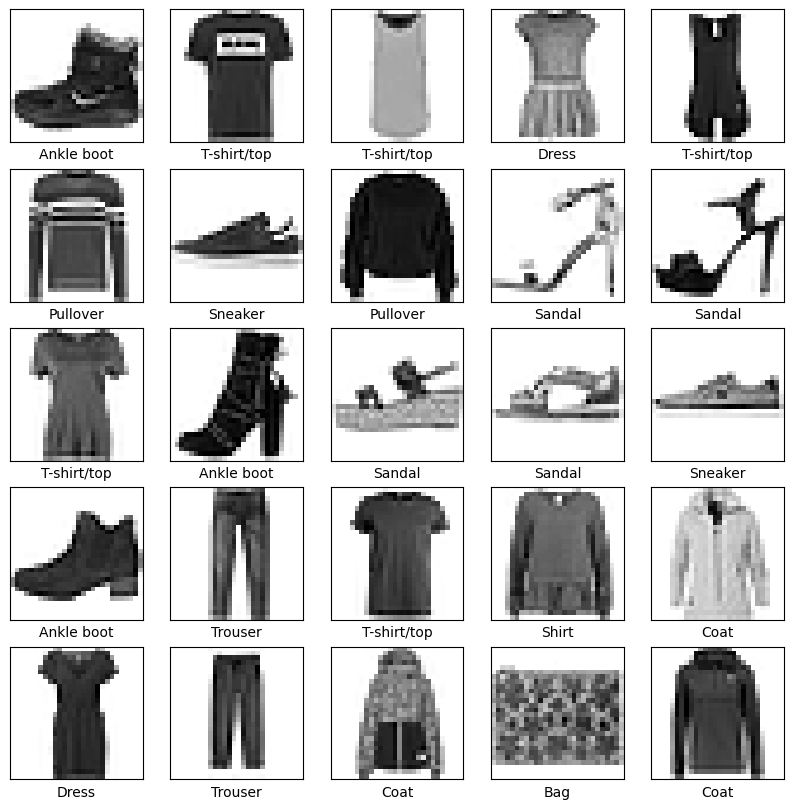

In [30]:
# To verify that the data is in the correct format and that we're ready to build and train the network,
# let's display the first 25 images from the training set and display the class name below each image.

plt.figure(figsize=(10,10))  # Creating a new figure with a specified size
for i in range(25):  # Looping through the first 25 images
    plt.subplot(5, 5, i + 1)  # Creating subplots in a 5x5 grid
    plt.xticks([])  # Hiding the x-axis ticks
    plt.yticks([])  # Hiding the y-axis ticks
    plt.grid(False)  # Hiding the grid lines
    plt.imshow(train_images[i], cmap=plt.cm.binary)  # Displaying the image with a binary color map
    plt.xlabel(class_names[train_labels[i]])  # Adding a label below each image with the class name
plt.show()  # Showing the plot


In [76]:
# Building the neural network requires configuring the layers of the model, then compiling the model.

# The basic building block of a neural network is the layer. Layers extract representations from the data fed into them.



# Importing necessary modules from Keras
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten

# Building the Sequential model by stacking layers
model = Sequential([
    Input(shape=(28, 28)),  # Input layer specifying the shape of input data (28x28 pixels)
    Flatten(),  # Flatten layer to convert each 2D 28x28 image into a 1D array of 784 pixels
    Dense(128, activation='relu'),  # Dense (fully connected) layer with 128 neurons and ReLU activation function
    Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each class) and softmax activation function
])




In [36]:
#Compile the model
#Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

#Optimizer —This is how the model is updated based on the data it sees and its loss function.
#Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
#Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [38]:
# Compile the model with necessary settings
model.compile(optimizer='adam',  # Optimizer to update the model based on training data
              loss='sparse_categorical_crossentropy',  # Loss function to measure accuracy during training
              metrics=['accuracy'])  # Metric to monitor the training and testing steps


In [40]:
# Training the model with the training data
# The model will iterate over the entire training dataset for 10 epochs

model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step - accuracy: 0.7848 - loss: 0.6253
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - accuracy: 0.8651 - loss: 0.3753
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 581us/step - accuracy: 0.8762 - loss: 0.3406
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 541us/step - accuracy: 0.8851 - loss: 0.3134
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 543us/step - accuracy: 0.8910 - loss: 0.2930
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 519us/step - accuracy: 0.8955 - loss: 0.2819
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 615us/step - accuracy: 0.9013 - loss: 0.2644
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - accuracy: 0.9039 - loss: 0.2559
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/step - accuracy: 0.9078 - loss: 0.2460
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step - accuracy: 0.9135 - loss: 0.2324


In [42]:
# Evaluating the model with the test data to determine the test loss and test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Printing the test accuracy
print('\nTest accuracy:', test_acc)


313/313 - 0s - 353us/step - accuracy: 0.8728 - loss: 0.3571

Test accuracy: 0.8727999925613403


In [44]:
# The test accuracy is slightly lower than the training accuracy, indicating overfitting.
# Overfitting occurs when the model performs well on training data but poorly on new, unseen data,
# as it has "memorized" the training data details and noise.


In [46]:
# Make predictions
# After training, use the model to make predictions on new images.
# Attach a softmax layer to convert the model's outputs (logits) to probabilities for easier interpretation.

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [48]:
# Making predictions on the test images using the probability model
predictions = probability_model.predict(test_images)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step


In [50]:
# The model has predicted the label for each image in the testing set.
# Let's take a look at the first prediction.

predictions[0]


array([0.08539727, 0.08539617, 0.08539621, 0.08539617, 0.08539622,
       0.08540523, 0.08539695, 0.08579315, 0.08539637, 0.23102632],
      dtype=float32)

In [52]:
# A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing.
# You can see which label has the highest confidence value by using the np.argmax function:

np.argmax(predictions[0])


9

In [54]:
# The model is most confident that this image is an ankle boot, or class_names[9].
# Examining the test label shows that this classification is correct:

test_labels[0]


9

In [58]:
#Define functions to graph the full set of 10 class predictions.

def plot_image(i, predictions_array, true_label, img):
    # Extract the true label and image for the i-th index
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    # Display the image in a binary colormap
    plt.imshow(img, cmap=plt.cm.binary)

    # Get the predicted label (index of the highest probability)
    predicted_label = np.argmax(predictions_array)

    # Determine the color based on the prediction correctness
    color = 'blue' if predicted_label == true_label else 'red'

    # Display the predicted label, confidence percentage, and true label
    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)


In [60]:
def plot_value_array(i, predictions_array, true_label):
    # Extract the true label for the i-th index
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])

    # Create a bar plot of the prediction probabilities
    bars = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])

    # Highlight the predicted and true labels
    predicted_label = np.argmax(predictions_array)
    bars[predicted_label].set_color('red')
    bars[true_label].set_color('blue')


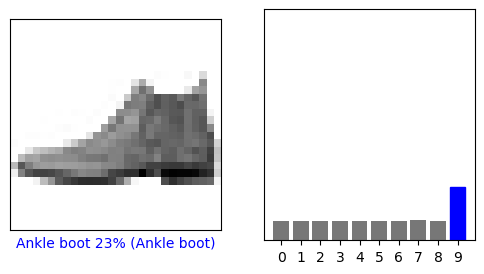

In [62]:
# Verify predictions
# Use the trained model to make predictions on new images.

# Display the 0th image, its prediction, and the prediction array.
# Correct predictions are shown in blue, incorrect ones in red. The number indicates the prediction confidence (percentage).

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()


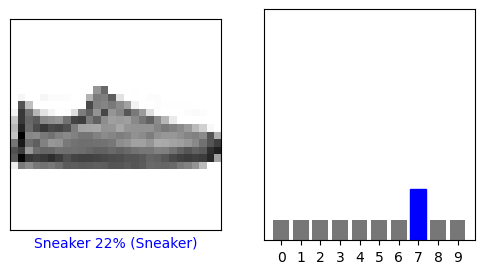

In [64]:
# Verify predictions for the 12th image.
# Display the image, its prediction, and the prediction array.
# Correct predictions are shown in blue, incorrect ones in red. The number indicates the prediction confidence (percentage).

i = 12
plt.figure(figsize=(6,3))

# Plot the image with prediction details
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)

# Plot the prediction array
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)

plt.show()


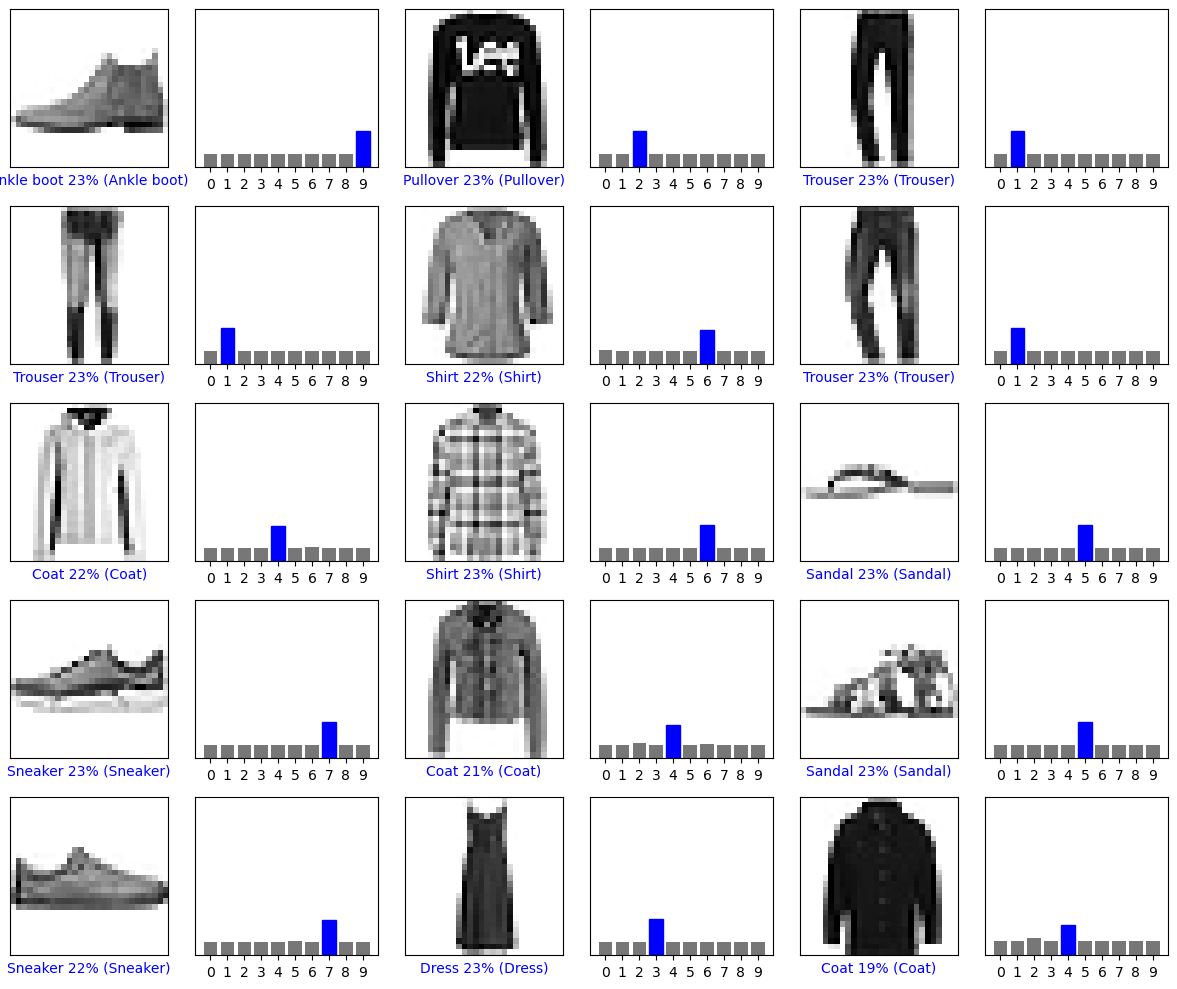

In [66]:
# Plot the first X test images, their predicted labels, and the true labels.
# Correct predictions are colored in blue and incorrect predictions in red.

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    # Plot image with prediction details
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    
    # Plot prediction array
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


In [68]:
# Use the trained model to make a prediction about a single image.

# Grab an image from the test dataset.
img = test_images[1]

# Print the shape of the grabbed image.
print(img.shape)


(28, 28)


In [70]:
# Now predict the correct label for this image:

# Since the model expects a batch of images, we need to add an extra dimension to the single image
img = np.expand_dims(img, axis=0)

# Use the probability model to predict the label for the single image
predictions_single = probability_model.predict(img)

# Print the prediction array for the single image
print(predictions_single)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.08542787 0.08541477 0.23073065 0.08541477 0.08580625 0.08541477
  0.08554661 0.08541477 0.08541477 0.08541477]]


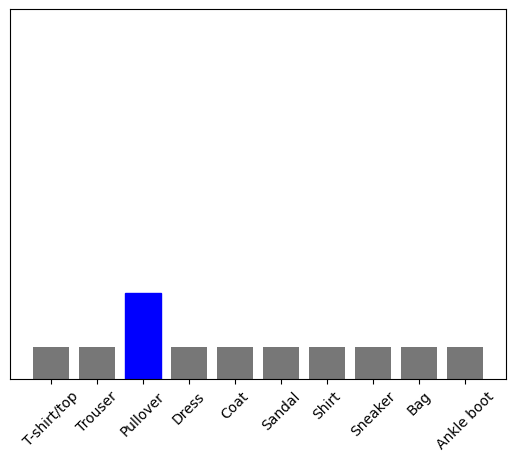

In [72]:
# Plot the prediction array for the single image
plot_value_array(1, predictions_single[0], test_labels)

# Set the x-ticks to be the class names and rotate them for better visibility
_ = plt.xticks(range(10), class_names, rotation=45)

# Show the plot
plt.show()


In [ ]:
# tf.keras.Model.predict returns a list of lists—one list for each image in the batch of data.
# Grab the predictions for our (only) image in the batch:

predicted_label = np.argmax(predictions_single[0])

# Print the predicted label
print(predicted_label)